#  Analiza Danych w Pythonie: `pandas`

### 23 października 2021

### `pandas`
Biblioteka `pandas` jest podstawowym narzędziem w ekosystemie Pythona do analizy danych:
 * dostarcza dwa podstawowe typy danych: `Series` (szereg, 1D) i `DataFrame` (ramka danych, 2D);
 * operacje na tych obiektach: obsługa brakujących wartości, łączenie danych;
 * obsługuje dane różnego typu, np. szeregi czasowe;
 * biblioteka bazuje na `numpy` -- bibliotece do obliczeń numerycznych;
 * pozwala też na prostą wizualizację danych;
 * ETL: extract, transform, load.

Żeby zaimportowąc bibliotekę `pandas` wystarczy:

In [2]:
import pandas as pd

#### __Zadanie 0__: sprawdź, czy masz zainstalowaną bibliotekę `pandas`.

### Szereg (`pd.Series`)

 Reprezentacja danych jednowymiarowych:
  * możemy stworzyć `Series` z listy lub słownika;
  * W przypadku słownika klucze stają się indeksem;
  * dane muszą być jednorodne, inaczej nastąpi automatyczna konwersja.

Najprościej jest stworzyć szereg z pythonowej listy lub słownika. Poniżej jest przykład przedstawiający tworzenie szeregu z danych, które są zawarte w liście:

In [3]:

data = [211819, 682758, 737011, 779511, 673790, 673790, 444177, 136791]

s = pd.Series(data)

print(s)

0    211819
1    682758
2    737011
3    779511
4    673790
5    673790
6    444177
7    136791
dtype: int64


A tu ze słownika:

In [5]:
members = {'April': 211819,'May': 682758, 'June': 737011, 'July': 779511,
'August': 673790, 'September': 673790, 'October': 444177, 'November': 136791,
}

s = pd.Series(members)

print(s)

April        211819
May          682758
June         737011
July         779511
August       673790
September    673790
October      444177
November     136791
dtype: int64


Jak widzimy w przypadku słownika indeks szeregu został stworzony na podstawie kluczy w słowniku. W przypadku listy indeks jest generowany klucz automatyczny, tj. liczby od 0 do `n`.

Podczas tworzenia szeregu możemy zdefiniować indeks, jak i nazwę szeregu:

In [3]:
months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

data = [211819, 682758, 737011, 779511, 673790, 673790, 444177, 136791]

s = pd.Series(data, months, int, 'Rides')
s = pd.Series(data, dtype=int, index=months, name='Rides')
s = pd.Series(data=data, dtype=int, index=months, name='Rides')

s

April        211819
May          682758
June         737011
July         779511
August       673790
September    673790
October      444177
November     136791
Name: Rides, dtype: int64

Podstawowa cechą szeregu jest wykonywanie operacji w sposób wektorowy. Działa to w następujący sposób:
 * gdy w obu szeregach jest zawarty ten sam klucz, to są sumowane ich wartości;
 * w przeciwnym przypadku wartość klucza w wynikowym szeregu to `pd.NaN`.  

In [15]:
members = pd.Series({'May': 682758, 'June': 737011,  'August': 673790, 'July': 779511,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492})

all_data = members + occasionals

all_data

August       880599.0
July         973827.0
June         908505.0
May          830656.0
October           NaN
September    814282.0
dtype: float64

Możemy wykonać operacje arytmetyczne na szeregu: 

In [17]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

members += 1000

members

May          683758
June         738011
July         780511
August       674790
September    674790
October      445177
dtype: int64

#### Tworzenie `pd.Series` ([documentacja](https://pandas.pydata.org/docs/reference/api/pandas.Series.html))
 Parametry:
  * `data`
  * `index`
  * `dtype`
  * `name` 

### Ramka danych (`pd.DataFrame`)
 Reprezentacja danych tabelarycznych:
 * różnorodność tworzenia `DataFrame`;
 * poszczególne kolumny to `pd.Series`;

Ramka danych reprezentuje dane tabularyczne (`2D`), gdzie kolumny odpowiadają cechom, zaś wiersze kolejnym obserwacją (przykładami).

Ramkę danych możemy stworzyć na wiele sposobów, w zależności od tego w jaki sposób mamy zorganizowane dane:
 * możemy podać zagnieżdżony słownik (tj. słownik w słowniku) - wtedy klucze w głównym słowniku będą odpowiadać nazwom kolumn, a klucze w podsłownikach - nazwom kluczy. 

In [24]:
members = {'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,'September': 673790, 'October': 444177}

occasionals = {'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809, 'September': 140492, 'October': 53596}

df = pd.DataFrame({'members': members, 'occasionals': occasionals})
df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


Drugim popularnym sposobem jest przekazanie listy słowników. Wtedy `pandas` zinterpretuje to jako listę przykładów:

In [4]:
data = [
    {'members': 682758, 'occasionals': 147898},
    {'occasionals': 171494,'members': 737011},
    {'members': 779511, 'occasionals': 194316},
]

df = pd.DataFrame(data)

df

,members,occasionals
0,682758,147898
1,737011,171494
2,779511,194316


Możemy też wykorzystać metodę `from_dict`:

In [32]:
data = {
    'May': {'members': 682758, 'occasionals': 147898},
    'June': {'members': 737011, 'occasionals': 171494},
    'July': {'members': 779511, 'occasionals': 194316}
}

df = pd.DataFrame.from_dict(data, orient='index')
df = pd.DataFrame.from_dict(data, orient='columns')
# df = pd.DataFrame(data)

df

,May,June,July
members,682758,737011,779511
occasionals,147898,171494,194316


### Wczytywanie danych

Biblioteka `pandas` pozwala na wczytanie danych z różnych formatów i źródeł:
 * formaty tekstowe: `csv`, `tsv`, `json`, `HTML`...
 * pliki arkuszy kalkulacyjnych: Excel
 * bazy danych: `sql`
 * inne: `sas` `spss`

 
Pliki nie muszą znajdować się dysku, możemy np. podać link.

Dane są wczytywane bezpośrednio do `pd.DataFrame`.

In [37]:
#  df = pd.read_csv('gapminder.csv')

df = pd.read_excel('./bikes.xlsx', engine='openpyxl')
df

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1
1,2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1
2,2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1
3,2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1
4,2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0
...,...,...,...,...,...,...
95,2019-04-14 08:25:52,7043,2019-04-14 08:30:20,6387,267,1
96,2019-04-14 08:26:04,6229,2019-04-14 08:30:49,6212,285,1
97,2019-04-14 08:26:44,6158,2019-04-14 08:48:29,6277,1304,1
98,2019-04-14 08:27:13,7043,2019-04-14 08:32:09,6387,296,1


In [37]:
import sqlite3

with sqlite3.connect('astro-timeline.sqlite3') as db:
    df = pd.read_sql("select * from logs", db)

In [40]:
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///astro-timeline.sqlite3', echo=True)
connection  = engine.raw_connection()

df = pd.read_sql_query('select * from logs', con=connection)

df

,id,datetime,level,message
0,1,1969-07-14 21:00:00+00:00,INFO,Terminal countdown started
1,2,1969-07-16 13:31:53+00:00,WARNING,S-IC engine ignition (#5)
2,3,1969-07-16 13:33:23+00:00,DEBUG,Maximum dynamic pressure (735.17 lb/ft^2)
3,4,1969-07-16 13:34:44+00:00,WARNING,S-II ignition
4,5,1969-07-16 13:35:17+00:00,DEBUG,Launch escape tower jettisoned
5,6,1969-07-16 13:39:40+00:00,DEBUG,S-II center engine cutoff
6,7,1969-07-16 16:22:13+00:00,INFO,Translunar injection
7,8,1969-07-16 16:56:03+00:00,INFO,CSM docked with LM/S-IVB
8,9,1969-07-16 17:21:50+00:00,INFO,Lunar orbit insertion ignition
9,10,1969-07-16 21:43:36+00:00,INFO,Lunar orbit circularization ignition


In [41]:
url = 'https://raw.githubusercontent.com/tomekd/Python2021/main/homework01/gapminder.csv'
df = pd.read_csv(url)

df

,Unnamed: 0,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
0,Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
1,Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
2,Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
3,Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
4,Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16
...,...,...,...,...,...,...,...,...
170,Venezuela,28.13408,27.44500,17911.0,28116716.0,17.1,74.2,2.53
171,Vietnam,21.06500,20.91630,4085.0,86589342.0,26.2,74.1,1.86
172,Palestine,29.02643,26.57750,3564.0,3854667.0,24.7,74.1,4.38
173,Zambia,23.05436,20.68321,3039.0,13114579.0,94.9,51.1,5.88


In [44]:
df = pd.read_csv('./titanic_train.tsv', sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila\t Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham\t Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston\t Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr\t Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df = pd.read_csv('gapminder.csv', index_col='Country')
df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16
...,...,...,...,...,...,...,...
Venezuela,28.13408,27.44500,17911.0,28116716.0,17.1,74.2,2.53
Vietnam,21.06500,20.91630,4085.0,86589342.0,26.2,74.1,1.86
Palestine,29.02643,26.57750,3564.0,3854667.0,24.7,74.1,4.38


In [46]:
df = pd.read_csv(
    'gapminder.csv',
    index_col='Country',
    usecols=['Country', 'gdp', 'population'])
df

,gdp,population
Country,,
Afghanistan,1311.0,26528741.0
Albania,8644.0,2968026.0
Algeria,12314.0,34811059.0
Angola,7103.0,19842251.0
Antigua and Barbuda,25736.0,85350.0
...,...,...
Venezuela,17911.0,28116716.0
Vietnam,4085.0,86589342.0
Palestine,3564.0,3854667.0


#### Wczytywanie danych
 * `pandas` pozwala na wczytanie danych z najróżniejszych źródeł ([lista](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html));
 * każda funkcja ma listę argumentów, które pozwalają na ustawić parametry (np. [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)).

### Zapis i eksport danych

In [48]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})

df.to_csv('tmp.csv')

In [49]:
df.to_excel('tmp.xlsx')

In [94]:
df.to_json()

'{"members":{"May":682758,"June":737011,"July":779511,"August":673790,"September":673790,"October":444177},"occasionals":{"May":147898,"June":171494,"July":194316,"August":206809,"September":140492,"October":53596}}'

In [51]:
data = df.to_dict()

data

{'members': {'May': 682758,
  'June': 737011,
  'July': 779511,
  'August': 673790,
  'September': 673790,
  'October': 444177},
 'occasionals': {'May': 147898,
  'June': 171494,
  'July': 194316,
  'August': 206809,
  'September': 140492,
  'October': 53596}}

In [52]:
df.to_clipboard()

#### Podstawowe metody `pd.Series` i `pd.DataFrame`

In [53]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})

df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


Metoda `head` pozwala tworzy nową ramkę danych z pierwszymi 5 przykładami:

In [56]:
df.head()

,members,occasionals
May,682758,147898


Metoda `tail` robi to samo, ale z 5 ostatnymi przykładami:

In [57]:
df.tail()

,members,occasionals
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


Metoda `sample` pozwala na stworzenie nowej ramki danych z wylosowanymi `n` przykładami:

In [60]:
df.sample(3)

,members,occasionals
May,682758,147898
August,673790,206809
September,673790,140492


Metoda `describe` zwraca podstawowe statystyki m.in.: liczebność, średnią, wartości skrajne: 

In [101]:
df.describe()

,members,occasionals
count,6.000000,6.000000
mean,665172.833333,152434.166667
std,116216.045456,54783.506738
min,444177.000000,53596.000000
25%,673790.000000,142343.500000
50%,678274.000000,159696.000000
75%,723447.750000,188610.500000
max,779511.000000,206809.000000


Metoda `info` zwraca informacje techniczne o kolumnach: np. typ danych:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, May to October
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   members      6 non-null      int64
 1   occasionals  6 non-null      int64
dtypes: int64(2)
memory usage: 144.0+ bytes


Atrybut `columns` zwraca nazwy kolumn w ramce danych:

In [66]:

list(df.columns)

['members', 'occasionals']

Natomiast atrybut `index` zwraca indeks:

In [105]:
df.index

Index(['May', 'June', 'July', 'August', 'September', 'October'], dtype='object')

Podstawową informacją o ramce danych to liczba przykładów w ramce danych. Możemy wykorzystać to tego funkcję `len`:

In [68]:
len(df)

6

Natomiast atrybut `shape` zwraca nam krotkę z liczbą przykładów i liczbą kolumn:

In [69]:
df.shape

(6, 2)

#### Operacja arytmetyczne

 * `max`
 * `min`
 * `mean`
 * `count`

In [71]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

In [76]:
df.std()

female_BMI         2.555711e+00
male_BMI           2.445384e+00
gdp                9.130827e+03
population         1.499161e+07
under5mortality    7.800758e+01
life_expectancy    1.169628e+01
fertility          2.272516e+00
dtype: float64

### Indeksowanie

In [77]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


#### Kolumny

In [80]:
# df.gdp

df['gdp']

Country
Afghanistan             1311.0
Albania                 8644.0
Algeria                12314.0
Angola                  7103.0
Antigua and Barbuda    25736.0
Name: gdp, dtype: float64

In [81]:
cols = ['gdp', 'population']

df[cols]

,gdp,population
Country,,
Afghanistan,1311.0,26528741.0
Albania,8644.0,2968026.0
Algeria,12314.0,34811059.0
Angola,7103.0,19842251.0
Antigua and Barbuda,25736.0,85350.0


#### `DataFrame.loc[]`

* pozwala na odwołanie się do wiersza;
* opcjonalnie możemy podać też nazwę kolumny;
* umożliwia _slicing_, czyli odwoływanie się po zakresie.

In [91]:
# print(df)

df.loc['Angola']

female_BMI         2.348431e+01
male_BMI           2.225083e+01
gdp                7.103000e+03
population         1.984225e+07
under5mortality    1.920000e+02
life_expectancy    5.670000e+01
fertility          6.430000e+00
Name: Angola, dtype: float64

In [133]:
df.loc[['Albania', 'Angola']]

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43


In [96]:
df2 = df.loc[['Albania', 'Angola'], ['gdp', 'population']]

df2

,gdp,population
Country,,
Albania,8644.0,2968026.0
Angola,7103.0,19842251.0


In [97]:
df.loc['Albania': 'Angola', 'gdp': 'life_expectancy']

,gdp,population,under5mortality,life_expectancy
Country,,,,
Albania,8644.0,2968026.0,17.9,76.8
Algeria,12314.0,34811059.0,29.5,75.5
Angola,7103.0,19842251.0,192.0,56.7


### Metoda `pd.DataFrame.at`
Pozwala na uzyskanie wartości pojedyńczej komórki.

In [99]:
df.at['Angola', 'gdp']

7103.0

### Dodawanie i modyfikowanie danych

In [101]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


In [108]:
conts = pd.Series({
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria':' Africa', 'Angola': 'Africa', 'Antigua and Barbuda': 'Americas'})

df['continent'] = conts

df['tmp'] = 1

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,continent,tmp
Country,,,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,Asia,1
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,Europe,1
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,Africa,1
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,Africa,1
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,Americas,1


In [109]:
df.loc['Argentina'] = {
    'female_BMI': 27.46523,
    'male_BMI': 27.5017,
    'gdp': 14646.0,
    'population': 40381860.0,
    'under5mortality': 15.4,
    'life_expectancy': 75.4,
    'fertility': 2.24
}
df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,continent,tmp
Country,,,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,Asia,1.0
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,Europe,1.0
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,Africa,1.0
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,Africa,1.0
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,Americas,1.0
Argentina,27.46523,27.50170,14646.0,40381860.0,15.4,75.4,2.24,NaN,NaN


In [122]:
df.drop('gdp', axis='columns')


,female_BMI,male_BMI,population,under5mortality,life_expectancy,fertility,continent,tmp
Country,,,,,,,,
Afghanistan,21.07402,20.62058,26528741.0,110.4,52.8,6.20,Asia,1.0
Algeria,26.36841,24.59620,34811059.0,29.5,75.5,2.73,Africa,1.0
Antigua and Barbuda,27.50545,25.76602,85350.0,10.9,75.5,2.16,Americas,1.0
Argentina,27.46523,27.50170,40381860.0,15.4,75.4,2.24,NaN,NaN


### Filtrowanie

Są dwa podstawowe sposoby na filtrowanie danych w `pd.DataFrame`:
 * operator `[]` -- najbardziej rozpowszechniony;
 * metoda `query()`.

In [123]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
pierwsza_klasa = df['Pclass'] == 1
kobiety = df['Sex'] == 'female'

df[pierwsza_klasa & kobiety]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
32,1,1,Spencer\t Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,Harper\t Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,Wick\t Mrs. George Dennick (Mary Hitchcock),female,45.0,1,1,36928,164.8667,NaN,S
863,1,1,Swift\t Mrs. Frederick Joel (Margaret Welles B...,female,48.0,0,0,17466,25.9292,D17,S
872,1,1,Beckwith\t Mrs. Richard Leonard (Sallie Monypeny),female,47.0,1,1,11751,52.5542,D35,S


#### Operatory

* `&` - koniukcja (i)
* `|` - alternatywa (lub)
* `~` - negacja (nie)
* `()` - jeżeli mamy kilka warunków to warto je uporządkować w nawiasy

In [138]:

df[df['SibSp'] > df['Parch']]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,0,3,Palsson\t Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
861,0,3,Hansen\t Mr. Claus Peter,male,41.0,2,0,350026,14.1083,NaN,S
862,0,2,Giles\t Mr. Frederick Edward,male,21.0,1,0,28134,11.5000,NaN,S
864,0,3,"Sage\t Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


#### `pd.DataFrame.query()`

In [139]:
df.query('Pclass == 1').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
7,0,1,McCarthy\t Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
24,1,1,Sloper\t Mr. William Thompson,male,28.0,0,0,113788,35.5000,A6,S


In [151]:
df.query('(Pclass == 1) and (Sex == "female")').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
32,1,1,Spencer\t Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,Harper\t Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C


In [153]:
df.query('SibSp > Parch')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,0,3,Palsson\t Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
861,0,3,Hansen\t Mr. Claus Peter,male,41.0,2,0,350026,14.1083,NaN,S
862,0,2,Giles\t Mr. Frederick Edward,male,21.0,1,0,28134,11.5000,NaN,S
864,0,3,"Sage\t Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [154]:
my_age = 31
df.query('Age == @my_age').shape

(17, 11)

#### Wywołanie funkcji na wierszach/kolumnach

In [155]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


In [162]:
def bmi_level(bmi):
    if bmi <= 18.5:
        level =  'underweight'
    elif bmi < 25:
        level =  'normal'
    elif bmi < 30:
        level =  'overweight'
    else:
        level = 'obese'
    return level

s = df['male_BMI'].map(bmi_level)
    
s

Country
Afghanistan                normal
Albania                overweight
Algeria                    normal
Angola                     normal
Antigua and Barbuda    overweight
Name: male_BMI, dtype: object

In [163]:
def bmi_level(row_data):
    bmi = row_data['male_BMI']
    if bmi <= 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    return  'obese'

df.apply(bmi_level, axis=1)

Country
Afghanistan                normal
Albania                overweight
Algeria                    normal
Angola                     normal
Antigua and Barbuda    overweight
dtype: object

#### Zbiór wartości

In [58]:
dane = pd.Series([1, 3, 2, 3, 1, 1, 2, 3, 2, 3])

dane.unique()

array([1, 3, 2])

#### Zliczanie wartości

In [215]:
dane = pd.Series([1, 3, 2, 3, 1, 1, 2, 3, 2, 3])

dane.value_counts()

3    4
1    3
2    3
dtype: int64

<AxesSubplot:>

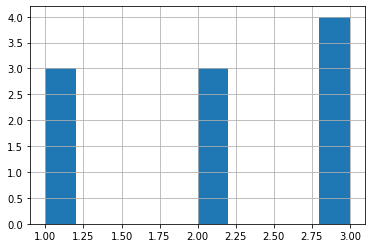

In [219]:
dane.hist()

In [220]:
df.transpose()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda
female_BMI,2.107402e+01,2.565726e+01,2.636841e+01,2.348431e+01,27.50545
male_BMI,2.062058e+01,2.644657e+01,2.459620e+01,2.225083e+01,25.76602
gdp,1.311000e+03,8.644000e+03,1.231400e+04,7.103000e+03,25736.00000
population,2.652874e+07,2.968026e+06,3.481106e+07,1.984225e+07,85350.00000
under5mortality,1.104000e+02,1.790000e+01,2.950000e+01,1.920000e+02,10.90000
life_expectancy,5.280000e+01,7.680000e+01,7.550000e+01,5.670000e+01,75.50000
fertility,6.200000e+00,1.760000e+00,2.730000e+00,6.430000e+00,2.16000


### Grupowanie (`groupby`)

Często zdarza się, gdy potrzebujemy podzielić dane ze względu na wartości w zadanej kolumnie, a następnie obliczenie zebranie danych w każdej z grup. Do tego służy metody `groupby`.

In [6]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


_Przykład_: chcemy obliczyć średnią dla każdej z kolumn z podziałem na płeć pasażera, która jest zawarta w kolumnie `Sex`. Stąd jako parametr do metody `groupby` podajemy nazwę kolumny `Sex`, a następnie wywołujemy metodę `mean`:

In [9]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Możemy też podać listę nazw kolumn. Wtedy wartości zostaną obliczone dla każdej z wytworzonych grup:

In [11]:
df.groupby(['Sex', 'Pclass']).mean()

Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                     
female 1       0.968085  34.611765  0.553191  0.457447  106.125798
       2       0.921053  28.722973  0.486842  0.605263   21.970121
       3       0.500000  21.750000  0.895833  0.798611   16.118810
male   1       0.368852  41.281386  0.311475  0.278689   67.226127
       2       0.157407  30.740707  0.342593  0.222222   19.741782
       3       0.135447  26.507589  0.498559  0.224784   12.661633

### Pivot
Metoda `pivot` pozwala na stworzenie nowej ramki danych, gdzie indeks i nazwy kolumn są wartościami początkowej ranki danych. 

_Przykład_: zobaczmy na poniższą ramkę danych, która zawiera informacje o jakości tłumaczenia dla pary językowej hausa-angielski. Kolumna `system` zawiera nazwę systemu, kolumna `metric` - nazwę metryki, zaś kolumna `score`- wartość metryki. Chcemy przedstawić te dane w następujący sposób: jako klucz chcemy mieć nazwę systemu, zaś jako kolumny -  metryki. Możemy wykorzystać do tego metodę `pivot`, gdzie musimy podać 3 argumenty:
 * `index`: nazwę kolumny, na podstawie której zostanie stworzony indeks;
 * `columns`: nazwa kolumny, które zawiera nazwy kolumn dla nowej ramki danych;
 * `values`: nazwa kolumny, która zawiera interesujące nas dane.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/wmt-conference/wmt21-news-systems/main/scores/automatic-scores.tsv', sep='\t')
df[df.pair == 'ha-en']

,pair,system,id,is_constrained,metric,score
0,ha-en,NiuTrans,382,True,bleu-all,16.512243
1,ha-en,NiuTrans,382,True,chrf-all,0.447248
2,ha-en,NiuTrans,382,True,bleu-A,16.512243
3,ha-en,NiuTrans,382,True,chrf-A,0.447248
4,ha-en,Online-B,1356,False,bleu-all,18.655658
5,ha-en,Online-B,1356,False,chrf-all,0.466582
6,ha-en,Online-B,1356,False,bleu-A,18.655658
7,ha-en,Online-B,1356,False,chrf-A,0.466582
8,ha-en,Facebook-AI,181,False,bleu-all,20.982704
9,ha-en,Facebook-AI,181,False,chrf-all,0.486538


In [54]:
df[df.pair == 'ha-en'].pivot(index='system', columns='metric', values='score')

metric,bleu-A,bleu-all,chrf-A,chrf-all
system,,,,
AMU,14.132845,14.132845,0.412566,0.412566
Facebook-AI,20.982704,20.982704,0.486538,0.486538
GTCOM,17.794272,17.794272,0.467148,0.467148
HuaweiTSC,17.492440,17.492440,0.467957,0.467957
MS-EgDC,17.133350,17.133350,0.452663,0.452663
Manifold,16.943915,16.943915,0.456384,0.456384
NiuTrans,16.512243,16.512243,0.447248,0.447248
Online-B,18.655658,18.655658,0.466582,0.466582
Online-Y,13.898531,13.898531,0.448429,0.448429


#### Dane tekstowe

`pandas` posiada udogodnienia do pracy z wartościami tekstowymi:
 * dostęp następuje przez atrybut `str`;
 * funkcje:
    * formatujące: `lower()`, `upper()`;
    * wyrażenia regularne: `contains()`, `match()`;
    * inne: `split()`

In [59]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.Name.str.upper()

PassengerId
1                               BRAUND\t MR. OWEN HARRIS
2      CUMINGS\t MRS. JOHN BRADLEY (FLORENCE BRIGGS T...
3                                HEIKKINEN\t MISS. LAINA
4          FUTRELLE\t MRS. JACQUES HEATH (LILY MAY PEEL)
5                              ALLEN\t MR. WILLIAM HENRY
                             ...                        
887                               MONTVILA\t REV. JUOZAS
888                        GRAHAM\t MISS. MARGARET EDITH
889            JOHNSTON\t MISS. CATHERINE HELEN "CARRIE"
890                               BEHR\t MR. KARL HOWELL
891                                 DOOLEY\t MR. PATRICK
Name: Name, Length: 891, dtype: object

In [70]:
print(df.Name.head())
df.Name.str.contains('Miss|Mrs').head()

PassengerId
1                             Braund\t Mr. Owen Harris
2    Cumings\t Mrs. John Bradley (Florence Briggs T...
3                              Heikkinen\t Miss. Laina
4        Futrelle\t Mrs. Jacques Heath (Lily May Peel)
5                            Allen\t Mr. William Henry
Name: Name, dtype: object


PassengerId
1    False
2     True
3     True
4     True
5    False
Name: Name, dtype: bool

In [74]:
df.Name.str.split('\t', expand=True)

,0,1
PassengerId,,
1,Braund,Mr. Owen Harris
2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss. Laina
4,Futrelle,Mrs. Jacques Heath (Lily May Peel)
5,Allen,Mr. William Henry
...,...,...
887,Montvila,Rev. Juozas
888,Graham,Miss. Margaret Edith
889,Johnston,"Miss. Catherine Helen ""Carrie"""


In [76]:

df.Name.str.split('\t')

PassengerId
1                             [Braund,  Mr. Owen Harris]
2      [Cumings,  Mrs. John Bradley (Florence Briggs ...
3                              [Heikkinen,  Miss. Laina]
4        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
5                            [Allen,  Mr. William Henry]
                             ...                        
887                             [Montvila,  Rev. Juozas]
888                      [Graham,  Miss. Margaret Edith]
889          [Johnston,  Miss. Catherine Helen "Carrie"]
890                             [Behr,  Mr. Karl Howell]
891                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [79]:
df.Name.str.split('\t').str[1]

PassengerId
1                                  Mr. Owen Harris
2       Mrs. John Bradley (Florence Briggs Thayer)
3                                      Miss. Laina
4               Mrs. Jacques Heath (Lily May Peel)
5                                Mr. William Henry
                          ...                     
887                                    Rev. Juozas
888                           Miss. Margaret Edith
889                 Miss. Catherine Helen "Carrie"
890                                Mr. Karl Howell
891                                    Mr. Patrick
Name: Name, Length: 891, dtype: object

In [81]:
df.Name.str.split('\t').str[1].str.strip().str.split(' ').str[0]

PassengerId
1        Mr.
2       Mrs.
3      Miss.
4       Mrs.
5        Mr.
       ...  
887     Rev.
888    Miss.
889    Miss.
890      Mr.
891      Mr.
Name: Name, Length: 891, dtype: object